In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure,show
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

In [2]:
data=[]
with open("D:\IIT-Delhi\Semester-2\SIL765-Networks & System Security\Project\Implementation\plot.txt") as f:
    data.extend([lines.strip().split("@") for lines in f.readlines()])
df=pd.DataFrame()
timestamp,aid=[],[]
for i in range(len(data)):
    timestamp.append(float(data[i][0]))
    aid.append(str(data[i][1]))
timestamp=np.array(timestamp)
df["Timestamp"]=timestamp
aid=np.array(aid)
df["aid"]=aid
df["aid"]=df["aid"].apply(int,base=16)
aid=np.array(df["aid"])
p=figure(title="ArbitrationID vs Time",x_axis_label="Time",y_axis_label="Arbitration_Id",sizing_mode="fixed",width=1000,height=500)
p.scatter(timestamp[:1000],aid[:1000])
show(p)
df["acc_clock_offset"]=df["Timestamp"].cumsum()
df["acc_clock_offset"]=df["Timestamp"]*(10**6)
delta=[]
flag=[]
a=df["aid"][0]
b=abs(df["aid"][1]-df["aid"][0])
if(a>b):
    delta.append(a)
    flag.append(0)
else:
    delta.append(b)
    flag.append(1)

for i in range(1,len(data)-1):
    a=abs(df["aid"][i]-df["aid"][i-1])
    b=abs(df["aid"][i+1]-df["aid"][i])
    if(a>b):
        delta.append(a)
        flag.append(0)
    else:
        delta.append(b)
        flag.append(1)

a=abs(df["aid"][len(df)-2]-df["aid"][len(df)-1])
b=abs(df["aid"][len(df)-1])
if(a>b):
    delta.append(a)
    flag.append(0)
else:
    delta.append(b)
    flag.append(1)
df["delta"]=np.array(delta)
df["flag"]=np.array(flag)
new_id=[]
for i in range(len(df)):
    if df['delta'][i]==0:
        new_id.append(df["aid"][i-1])
    elif df["flag"][i]==0 and (df["aid"][i]-(df["acc_clock_offset"][i]%df["delta"][i]))>=0.0:
        new_id.append(df["aid"][i]-(df["acc_clock_offset"][i]%df["delta"][i]))
    else:
        new_id.append(df["aid"][i]+(df["acc_clock_offset"][i]%df["delta"][i]))
new_id=np.array(new_id)
new_id=np.int64(new_id)
new_id
p=figure(title="Dynamic ArbitrationID vs Time",x_axis_label="Time",y_axis_label="Dynamic ArbitrationID",sizing_mode="fixed",width=1000,height=500)
p.scatter(timestamp[:1000],new_id[:1000])
show(p)

In [3]:
df.corr()

,Timestamp,aid,acc_clock_offset,delta,flag
Timestamp,1.000000,0.000775,1.000000,-0.025723,-0.008624
aid,0.000775,1.000000,0.000775,0.028920,0.118029
acc_clock_offset,1.000000,0.000775,1.000000,-0.025723,-0.008624
delta,-0.025723,0.028920,-0.025723,1.000000,0.011085
flag,-0.008624,0.118029,-0.008624,0.011085,1.000000


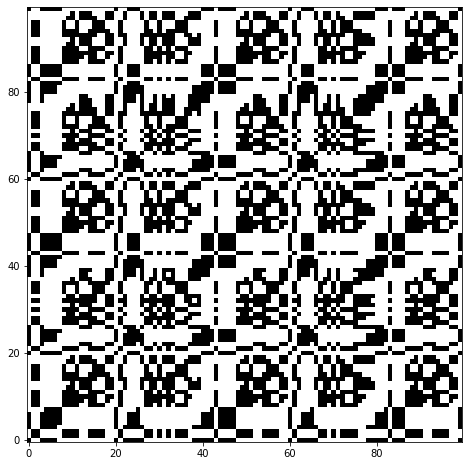

In [4]:
cnn_id_data=aid[:(10000)]
cnn_id_data=np.array(cnn_id_data)
cnn_id_data=cnn_id_data.reshape(100,100)
# unique_ids = list(set(cnn_id_data))
# id_to_num = dict(zip(unique_ids, range(len(unique_ids))))
# num_sequence = [id_to_num[id] if id in id_to_num else -1 for id in cnn_id_data]
# num_sequence=np.array(num_sequence)
# num_sequence=num_sequence.reshape(100,100)
rp = RecurrencePlot(dimension=1,threshold='point',percentage=40)
X_rp = rp.transform(cnn_id_data)
plt.figure(figsize=(8, 8))
plt.imshow(X_rp[1], cmap='binary', origin='lower')
plt.show()

In [5]:
X_rp[0]

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [6]:
image=np.array(X_rp[0])
image=image.astype(int)
image=image.reshape(1,100,100,1)

In [7]:
image.shape

(1, 100, 100, 1)

CNN code:-

In [8]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,InputLayer
from keras import Sequential
from keras.optimizers import Adam

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(128, input_shape=(100, 100), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

In [9]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])
#,loss="binary_crossentropy",metrics=["accuracy"]

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 128)          117248    
                                                                 
 dropout_2 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 166,721
Trainable params: 166,721
Non-trainable params: 0
_________________________________________________________________


In [14]:
X=image
y=np.array([0])
y.reshape(1,1)
history=model.fit(X,y,epochs=50)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.8312 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 78ms/step - loss: 0.4265 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 72ms/step - loss: 0.2249 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 68ms/step - loss: 0.1336 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 0.0654 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 58ms/step - loss: 0.0647 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 60ms/step - loss: 0.0778 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 56ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 63ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 62ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 11/50
1/1 [==========

KeyError: 'epoch'

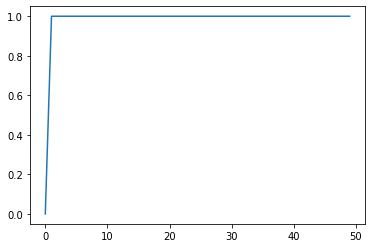

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["epoch"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()